# Chaper 1: Getting started with Image Processing

## Excercise 2: Use the scipy ndimage and misc modules' functions to zoom, crop, resize

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from PIL import Image  # Dùng Pillow thay cho scipy.misc

# Đọc hình ảnh
image = Image.open('..\\images\\bisons.jpg')  # Thay 'path_to_your_image.jpg' bằng đường dẫn tới hình ảnh của bạn


*   Hàm ndimage.zoom(image, (5, 5)) sử dụng phương pháp nội suy để phóng to (zoom) hình ảnh. Trong đó (5, 5) chỉ rằng chiều cao và chiều rộng của hình ảnh sẽ được phóng to gấp 5 lần. Kết quả là mỗi pixel sẽ được mở rộng, làm tăng kích thước ảnh.


*  crop_image: Đây là cách cắt một phần của hình ảnh từ các tọa độ chỉ định. Câu lệnh này cắt hình ảnh từ tọa độ (50, 50) đến (150, 150) tức là lấy vùng ảnh có chiều rộng và chiều cao từ pixel thứ 50 đến pixel thứ 150 (theo cả chiều ngang và chiều dọc).


*   Image.fromarray(image): Chuyển mảng numpy image thành đối tượng hình ảnh của thư viện PIL (Python Imaging Library) để dễ dàng sử dụng các phương thức của PIL.
    
*   .resize((200, 200)): Thay đổi kích thước của hình ảnh thành (200, 200), tức là kích thước mới của ảnh sẽ có chiều rộng và chiều cao đều là 200 pixel.
    
*   np.array(resized\_image): Sau khi thay đổi kích thước, chúng ta chuyển đổi lại đối tượng hình ảnh từ PIL thành mảng numpy để có thể tiếp tục xử lý bằng các công cụ của numpy.

In [12]:

image = np.array(image)  # Chuyển đổi hình ảnh sang mảng numpy

# Nếu là ảnh màu (RGB), hãy chuyển đổi thành ảnh đơn sắc để áp dụng affine
if image.ndim == 3:  # Nếu ảnh có 3 kênh (RGB)
    image = image[:, :, 0]  # Chọn kênh màu đầu tiên để làm ảnh đơn sắc (hoặc có thể chọn cách khác để chuyển ảnh thành đen trắng)

# 1. Zoom (phóng to)
zoomed_image = ndimage.zoom(image, (5, 5))  # Phóng to hình ảnh gấp 2 lần theo chiều cao và chiều rộng

# 2. Crop (cắt ảnh)
crop_image = image[50:150, 50:150]  # Cắt ảnh từ tọa độ (50, 50) đến (150, 150)

# 3. Resize (thay đổi kích thước) - Dùng Pillow để thay đổi kích thước
resized_image = Image.fromarray(image).resize((200, 200))  # Thay đổi kích thước ảnh thành (200, 200)
resized_image = np.array(resized_image)  # Chuyển đổi lại thành mảng numpy sau khi resize

# 4. Áp dụng phép biến đổi Affine
# Tạo ma trận phép biến đổi Affine (ví dụ: xoay và dịch chuyển)
affine_matrix = np.array([[1, 0.2], [0.2, 1]])  # Ma trận Affine với dịch chuyển và xoay nhẹ
offset = (50, 50)  # Dịch chuyển ảnh sau phép biến đổi

affine_image = ndimage.affine_transform(image, affine_matrix, offset=offset)



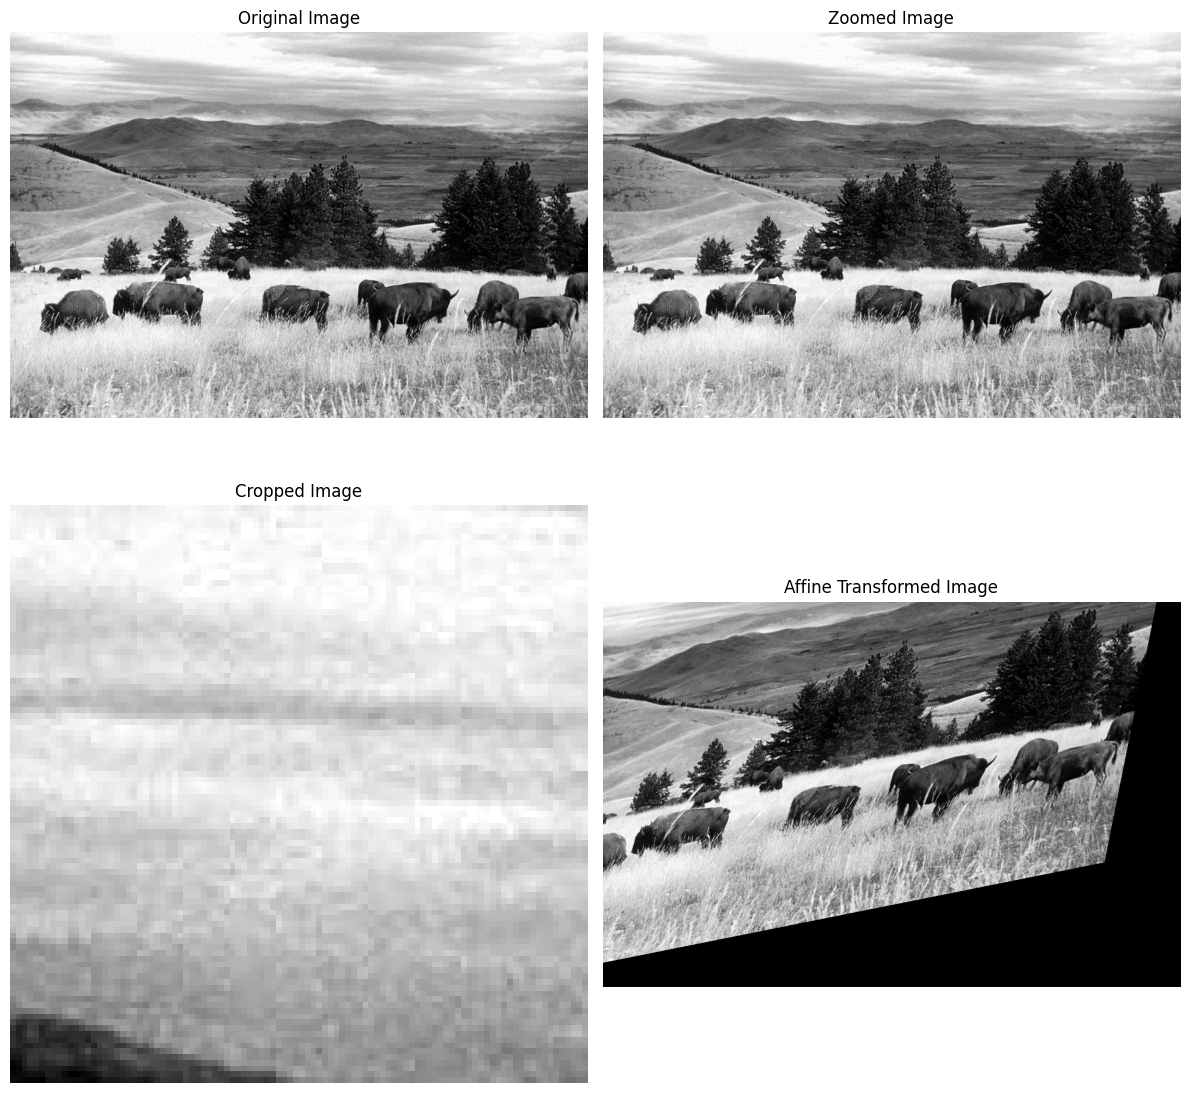

In [13]:
# Hiển thị các ảnh đã chỉnh sửa
# Hiển thị kết quả
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
ax = axes.ravel()
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(zoomed_image, cmap='gray')
ax[1].set_title('Zoomed Image')
ax[1].axis('off')

ax[2].imshow(crop_image, cmap='gray')
ax[2].set_title('Cropped Image')
ax[2].axis('off')

ax[3].imshow(affine_image, cmap='gray')
ax[3].set_title('Affine Transformed Image')
ax[3].axis('off')

plt.tight_layout()
plt.show()